In [ ]:
import numpy as np

***QUESTION - 1***

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import pandas as pd

# Path to the ZIP file in Google Drive
zip_file_path = '/content/drive/My Drive/archive.zip'

# Path to the CSV file within the ZIP archive
csv_file_path = 'faithful.csv'

# Extract the CSV file from the ZIP archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(csv_file_path, path='/content')

# Read the CSV file into a DataFrame
df = pd.read_csv(f'/content/{csv_file_path}')
df.drop(columns=['Unnamed: 0'], inplace=True)

# Display the first few rows of the DataFrame
print(df)

     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


In [ ]:
# Separate features (X) and target (y)

X = df[['waiting','eruptions']]

# from matplotlib import pyplot as plt

# plt.scatter(df[['eruptions']],df[['waiting']])
print(X)

     waiting  eruptions
0         79      3.600
1         54      1.800
2         74      3.333
3         62      2.283
4         85      4.533
..       ...        ...
267       81      4.117
268       46      2.150
269       90      4.417
270       46      1.817
271       74      4.467

[272 rows x 2 columns]


In [ ]:
def plot_graph(df,centroids):
  # Plot the data points and centroids
  plt.scatter(df[['eruptions']],df[['waiting']])
  plt.scatter(centroids['eruptions'], centroids['waiting'], c='black', marker='.', s=200, label='Centroids')
  plt.xlabel('TimeEruption')
  plt.ylabel('TimeWaiting')
  plt.title(f'K-Means Clustering with EM Steps (k={k})')
  plt.legend()
  plt.show()

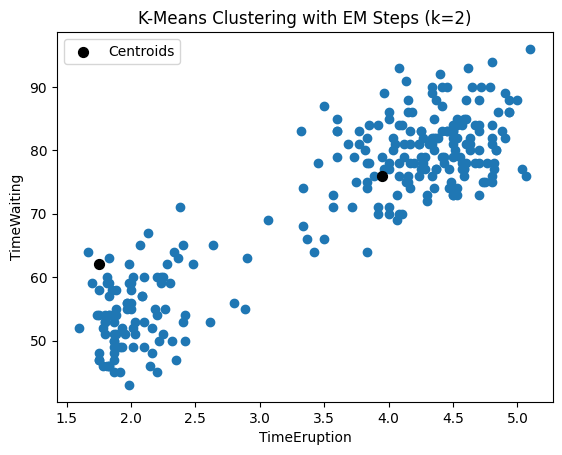

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

k = 2

def K_means(df,k,x_0='waiting',x_1='eruptions'):
  # Initialize centroids randomly
  centroids = X.sample(n=k)
  centroids.index = range(k)

  # plot before running loop
  plot_graph(df,centroids)

  for t in range(100):
      # E-step: Assign each point to the nearest centroid
      distances = np.sqrt(((X - centroids.iloc[0])**2).sum(axis=1))
      labels = np.zeros(X.shape[0])

      for i in range(1, k):
          new_distances = np.sqrt(((X - centroids.iloc[i])**2).sum(axis=1))
          labels[new_distances < distances] = i
          distances = np.minimum(distances, new_distances)

      # M-step: Update centroids
      new_centroids = X.groupby(labels).mean()

      centroids = new_centroids

      centroid_list = centroids[[x_0,x_1]].to_numpy()

  return centroids, centroid_list


centroids,_ = K_means(df,k)




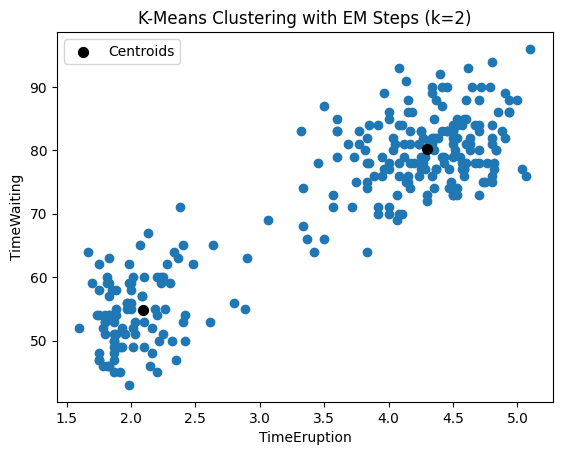

In [ ]:
plot_graph(df,centroids)

***QUESTION - 2(a)***

In [ ]:
n = 1000
r = np.random.RandomState(0)

cluster1 = r.multivariate_normal([-4,1], [[1,0], [0,4]], size=[n//3,])
cluster2 = r.multivariate_normal([0,5], [[5,0], [0,1]], size=[n//3,])
cluster3 = r.multivariate_normal([0,0], [[1,1], [1,4]], size=[n//3,])
print(cluster1)


[[-3.59984279e+00  4.52810469e+00]
 [-1.75910680e+00  2.95747597e+00]
 [-4.97727788e+00  4.73511598e+00]
 [-4.15135721e+00  2.90017684e+00]
 [-3.58940150e+00  7.93562296e-01]
 [-2.54572649e+00  1.28808714e+00]
 [-3.87832498e+00  2.52207545e+00]
 [-3.66632567e+00  1.88772647e+00]
 [-4.20515826e+00  3.98815815e+00]
 [-4.85409574e+00  1.62613540e+00]
 [-3.34638140e+00 -4.10597963e+00]
 [-4.74216502e+00  2.72887240e+00]
 [-5.45436567e+00  5.53950925e+00]
 [-4.18718385e+00  1.09151703e+00]
 [-2.53064123e+00  4.06555843e+00]
 [-3.62183748e+00  1.30989485e+00]
 [-5.98079647e+00 -7.75571495e-01]
 [-3.84365103e+00  3.04175701e-01]
 [-2.79762015e+00  3.46058136e+00]
 [-4.30230275e+00  2.25346365e-01]
 [-5.42001794e+00 -1.09710593e+00]
 [-2.04922460e+00 -2.41254038e+00]
 [-4.43807430e+00 -1.93043635e-02]
 [-3.22250964e+00 -1.50559072e+00]
 [-4.21274028e+00 -2.22779570e+00]
 [-3.61309750e+00 -7.90933122e-01]
 [-5.18063218e+00 -2.16102751e-02]
 [-3.57166813e+00  9.43635543e-01]
 [-3.69752810e+00  1

In [ ]:
from matplotlib import pyplot as plt

# for i in range(n//3):
#   plt.scatter(cluster1[i][0],cluster1[i][1], color="blue")
#   plt.scatter(cluster2[i][0],cluster2[i][1], color="red")
#   plt.scatter(cluster3[i][0],cluster3[i][1], color="green")

# plt.title("plot")
# plt.show()

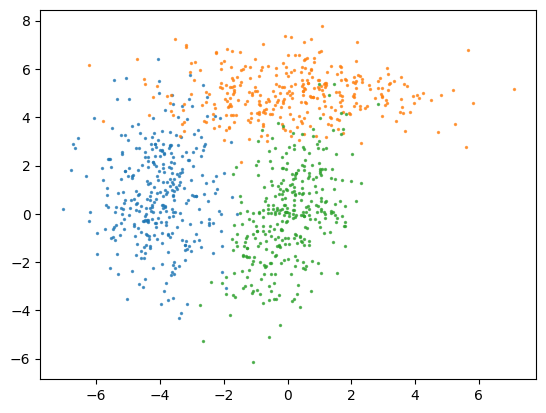

In [ ]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(cluster1[:,0], cluster1[:,1], s=2, alpha=0.7)
ax.scatter(cluster2[:,0], cluster2[:,1], s=2, alpha=0.7)
ax.scatter(cluster3[:,0], cluster3[:,1], s=2, alpha=0.7)
ax.autoscale(enable=True)

In [ ]:

cluster = np.concatenate((cluster1,cluster2,cluster3))
cluster.shape[0]

999

In [ ]:
from scipy.stats import multivariate_normal

def GMM_EM(meu,sigma,pi,k,dim):

  for i in range(k):
    sigma[i] = np.eye(dim)

  num_points = cluster.shape[0]

  gamma = np.random.rand(num_points,k)

  # E-step
  for t in range(100):
    for i in range(k):
      # print(gamma)
      gamma[:, i] = pi[i] * multivariate_normal.pdf(cluster, mean=meu[i], cov=sigma[i])
    sum_gamma = gamma.sum(axis=1, keepdims=True)
    # Check for zero sum
    gamma /= sum_gamma
    # gamma /= gamma.sum(axis=1, keepdims=True)

    # M-step
    sum_z = gamma.sum(axis=0)
    pi = sum_z / num_points
    meu = np.matmul(gamma.T, cluster)
    meu /= sum_z[:, None]
    for i in range(k):
        j = np.expand_dims(cluster, axis=1) - meu[i]
        # sigma[i] = np.dot(gamma[:,i]*j.T,j)/ gamma[:,k].sum()
        s = np.matmul(j.transpose([0, 2, 1]), j)
        sigma[i] = np.matmul(s.transpose(1, 2, 0),gamma[:, i] )
        sigma[i] /= sum_z[i]
  return meu,sigma,pi



In [ ]:
meu1 = np.random.rand(3,2)
pi1 = np.ones(3)/3
dim =2
sigma1 = np.zeros((3, dim, dim))

meu, sigma, pi = GMM_EM(meu1,sigma1,pi1,k = 3,dim = 2)

# print(meu)
# print("\n")
# print(sigma)
# print("\n")
# print(pi)

In [ ]:
def plot_clusters(X, meu, sigma):
    # Plot clusters using final means (meu) and covariance matrices (sigma)
    K = len(meu)
    fig = plt.figure()
    ax = fig.gca()


    for k in range(K):
        rv = multivariate_normal(meu[k], sigma[k])
        x, y = np.mgrid[-10:10:.1, -10:10:.1]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x
        pos[:, :, 1] = y
        plt.contour(x, y, rv.pdf(pos), color = 'purple', alpha=0.5)

    ax.scatter(X[:, 0], X[:, 1], color='black', alpha=0.2)
    ax.scatter(meu[:, 0], meu[:, 1], marker='o', s=150, color='yellow')
    ax.autoscale(enable=True)
    plt.title('Clusters(GMM) with Means and Covariances')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

<ipython-input-281-1d77fa7e9c71>:14: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(x, y, rv.pdf(pos), color = 'purple', alpha=0.5)


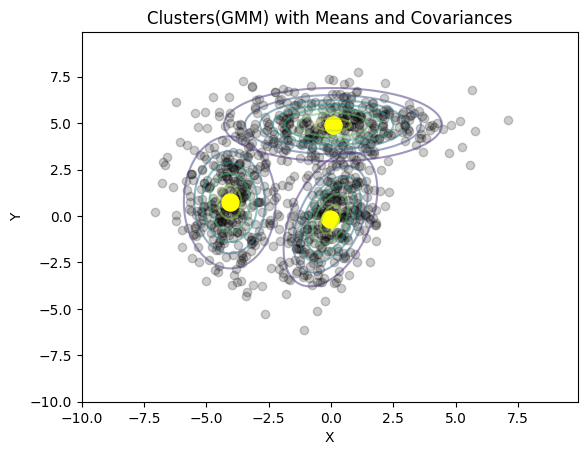

In [ ]:
plot_clusters(cluster, meu, sigma)

***QUESTION - 3***

In [ ]:
#print(cluster)
cluster_converted = pd.DataFrame(cluster, columns=['waiting', 'eruptions'])
# print(cluster_converted)

In [ ]:
# plt.scatter(cluster_converted['eruptions'],cluster_converted['waiting'])
# plt.scatter(centroids['eruptions'], centroids['waiting'], c='black', marker='.', s=200, label='Centroids')
# plt.xlabel('TimeEruption')
# plt.ylabel('TimeWaiting')
# plt.title(f'K-Means Clustering with EM Steps (k={k})')
# plt.legend()
# plt.show()